In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Creating the Synthetic Dataset
np.random.seed(42)
data = {
    'Age': np.random.randint(18, 65, 100),
    'Salary': np.random.randint(30000, 150000, 100),
    'Department': np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], 100),
    'Experience': np.random.randint(1, 40, 100),
    'Satisfaction_Score': np.random.uniform(1, 5, 100)
}

df = pd.DataFrame(data)

# Univariate Non-Graphical EDA
print("\n--- Univariate Non-Graphical EDA ---")
print("Summary Statistics:")
print(df.describe())  # Summary statistics for numerical features

# Frequency count for categorical column
print("\nFrequency of Departments:")
print(df['Department'].value_counts())  # Frequency of categorical column


--- Univariate Non-Graphical EDA ---
Summary Statistics:
             Age         Salary  Experience  Satisfaction_Score
count  100.00000     100.000000  100.000000          100.000000
mean    40.88000   90710.230000   22.340000            2.840573
std     13.99082   35601.990995   11.237761            1.210565
min     18.00000   30206.000000    1.000000            1.020739
25%     30.50000   57163.000000   15.500000            1.735867
50%     41.00000   91615.500000   24.000000            2.738387
75%     53.25000  119596.750000   32.250000            3.807448
max     64.00000  149324.000000   39.000000            4.927364

Frequency of Departments:
Department
Marketing    31
Finance      26
HR           22
IT           21
Name: count, dtype: int64


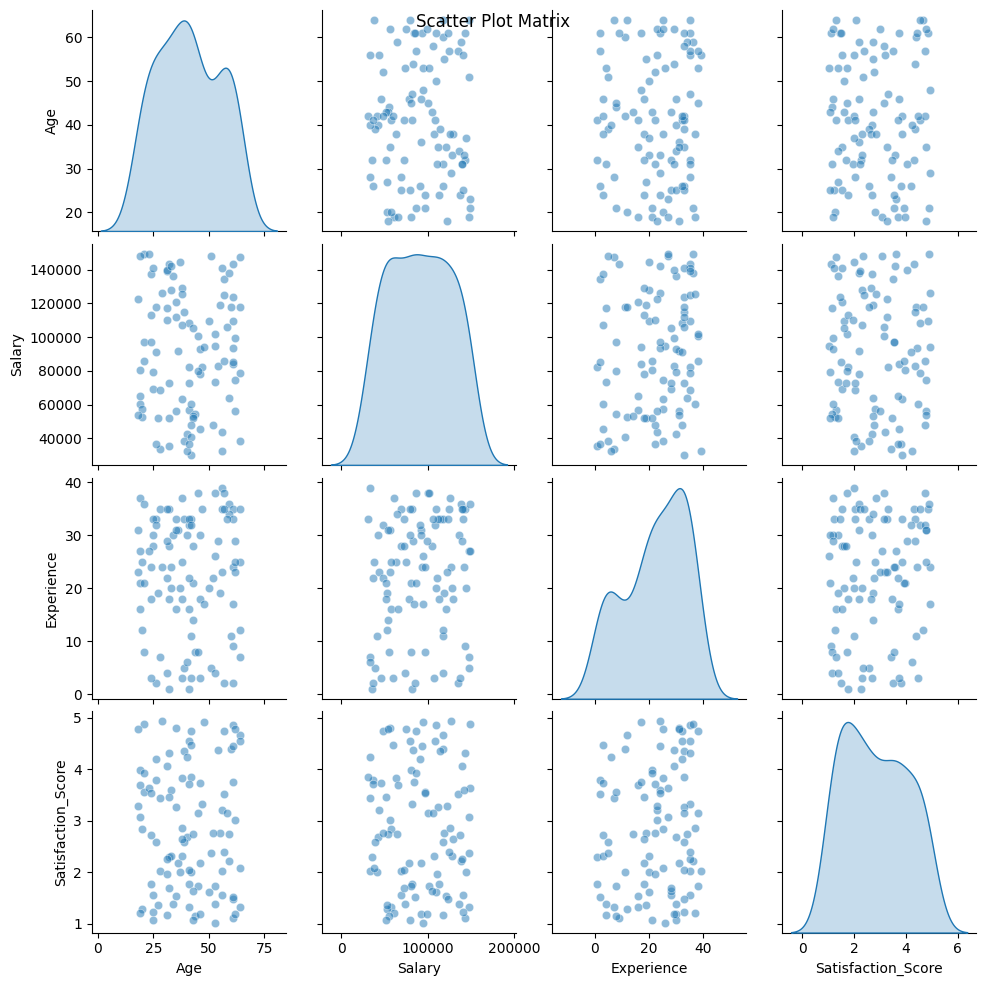

In [3]:
# Scatter plot matrix
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Scatter Plot Matrix")
plt.show()

In [4]:
# Encoding Categorical Data (Optional)
label_encoder = LabelEncoder()
df['Department_Encoded'] = label_encoder.fit_transform(df['Department'])
print("\n--- Correlation Matrix Including Encoded Categorical Features ---")

# Select only numerical columns for the correlation matrix
correlation_with_encoded = df.select_dtypes(include=[np.number]).corr()
print(correlation_with_encoded)


--- Correlation Matrix Including Encoded Categorical Features ---
                         Age    Salary  Experience  Satisfaction_Score  \
Age                 1.000000  0.000555    0.005530           -0.021509   
Salary              0.000555  1.000000    0.159570           -0.048732   
Experience          0.005530  0.159570    1.000000            0.125004   
Satisfaction_Score -0.021509 -0.048732    0.125004            1.000000   
Department_Encoded  0.042629  0.073279    0.069623            0.200357   

                    Department_Encoded  
Age                           0.042629  
Salary                        0.073279  
Experience                    0.069623  
Satisfaction_Score            0.200357  
Department_Encoded            1.000000  


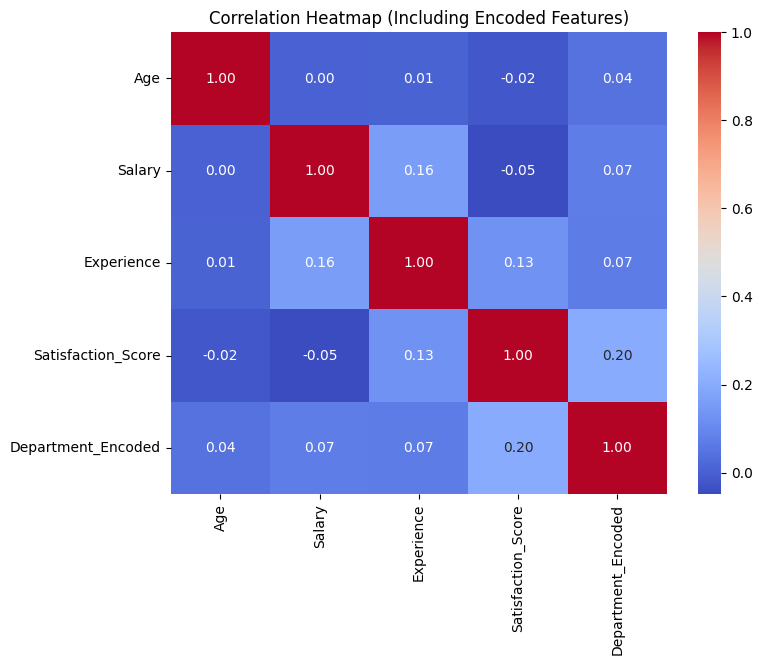

In [5]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Including Encoded Features)")
plt.show()

In [6]:
# Multivariate Non-Graphical EDA
print("\n--- Multivariate Non-Graphical EDA ---")
print("\nCorrelation Matrix (Numerical Features Only):")
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Only numerical columns
print(correlation_matrix)

# Graphical EDA
sns.set(style="whitegrid", palette="pastel")


--- Multivariate Non-Graphical EDA ---

Correlation Matrix (Numerical Features Only):
                         Age    Salary  Experience  Satisfaction_Score  \
Age                 1.000000  0.000555    0.005530           -0.021509   
Salary              0.000555  1.000000    0.159570           -0.048732   
Experience          0.005530  0.159570    1.000000            0.125004   
Satisfaction_Score -0.021509 -0.048732    0.125004            1.000000   
Department_Encoded  0.042629  0.073279    0.069623            0.200357   

                    Department_Encoded  
Age                           0.042629  
Salary                        0.073279  
Experience                    0.069623  
Satisfaction_Score            0.200357  
Department_Encoded            1.000000  


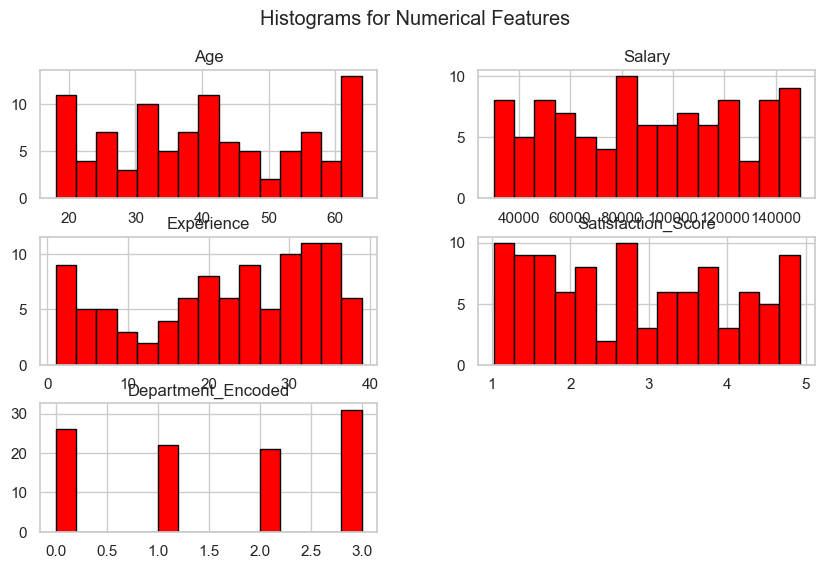

In [7]:
# Histograms for numerical variables
df.select_dtypes(include=[np.number]).hist(bins=15, figsize=(10, 6), color="red", edgecolor="black")
plt.suptitle("Histograms for Numerical Features")
plt.show()

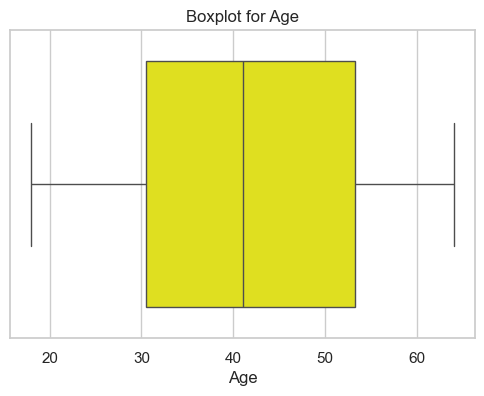

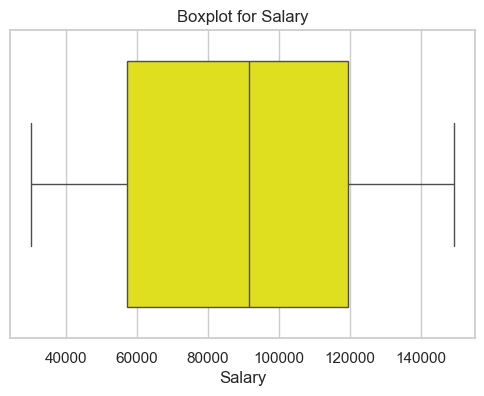

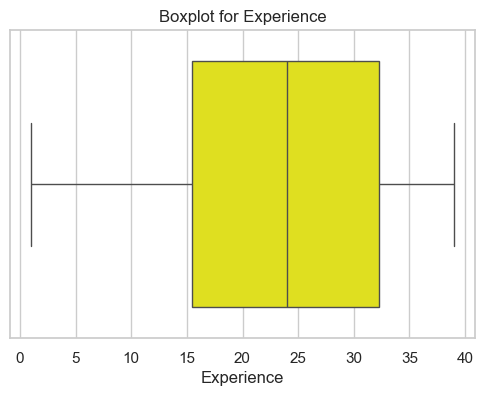

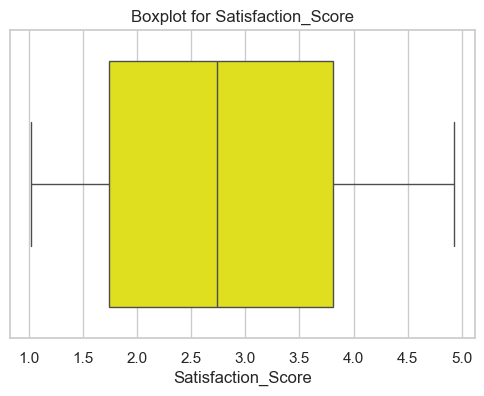

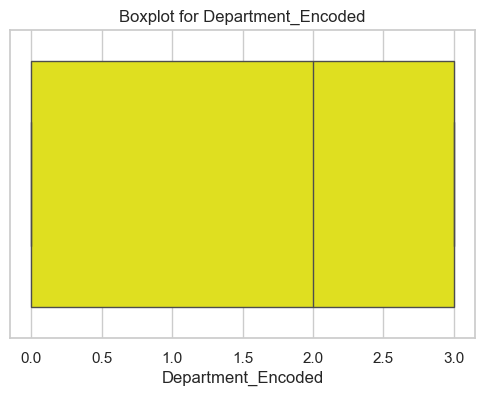

In [8]:
# Box plots for numerical variables
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, color="yellow")
    plt.title(f"Boxplot for {col}")
    plt.show()